<a href="https://colab.research.google.com/github/wkdtjrrb/2023S-Ajou-ML/blob/main/HW2_202127288_%EC%9E%A5%EC%84%9D%EA%B7%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Colab Notebooks/hw2' 

/content/drive/MyDrive/Colab Notebooks/hw2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 데이터 불러오기

In [4]:
df = pd.read_csv('./train.csv') # 제공된 train.csv 사용 # 환경에 맞게 path 조절 가능

In [5]:
df.shape

(614, 12)

In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [8]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

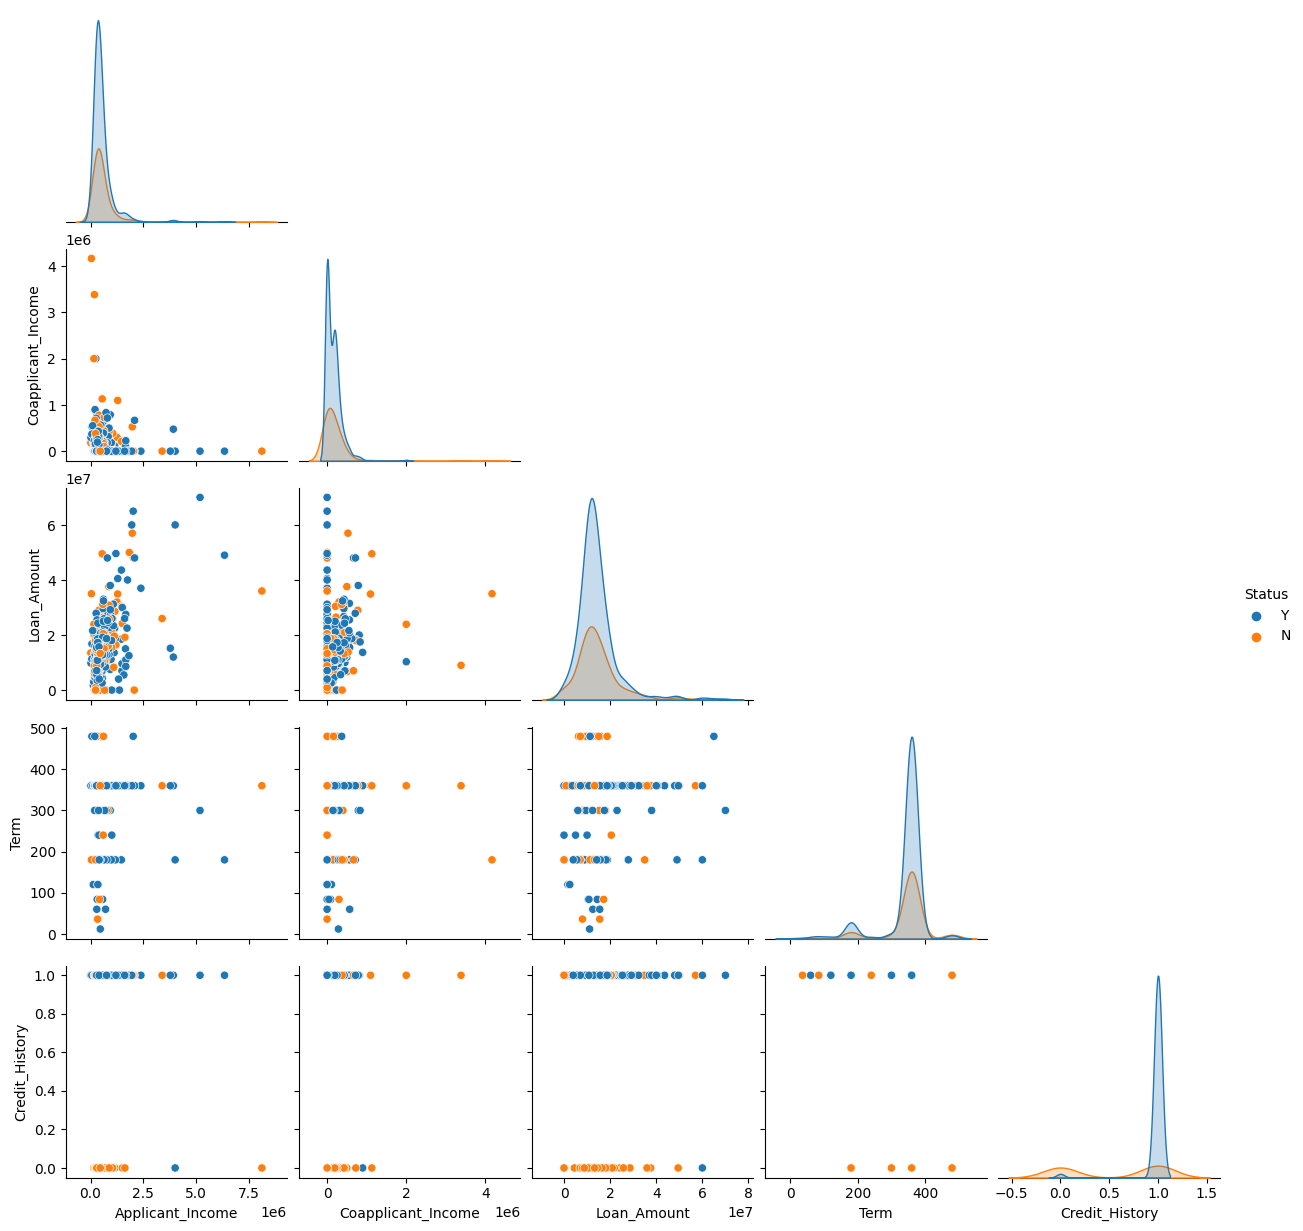

In [10]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

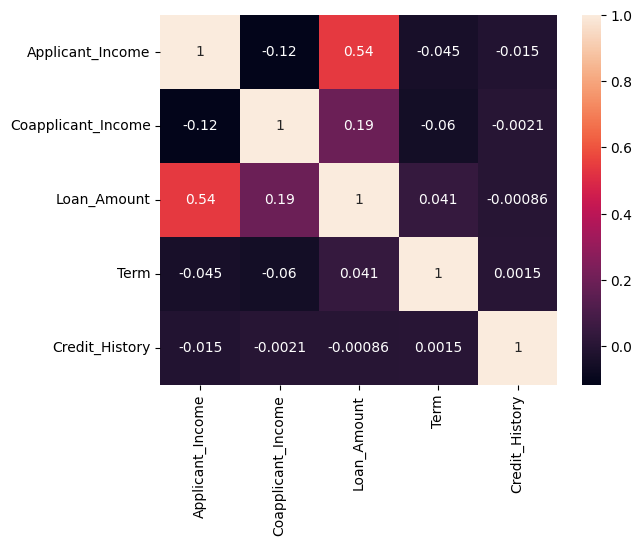

In [11]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [12]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  
참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.

결측치 제거 시 'Credit_History'열도 함께 제거합니다.

왜냐하면 'Credit_History'열은 0,1,결측치 로 구성되어 있기 때문에 categorical feature로 볼 수 있습니다.

'Credit_History'는 문제2에서 Label Encoding하지 않아도 됩니다(이미 되어있음).

In [13]:
## 문제 1 ##
# 코드 작성
cat = df.select_dtypes(include = 'object') #cat = categorical 변수
new_col = df['Credit_History'] # to include 'Credit_History in cat
cat['Credit_History'] = new_col
df = df.dropna(subset = cat.columns) #delete row with nan in cat
df = df.reset_index(drop=True) #rearrange index
##########

## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

In [16]:
## 문제 2 ##
# 코드 작성
for col in categorical:#choose one by one in categorical feature
  le = LabelEncoder() #define labelencoder 
  df[col] = le.fit_transform(df[col])# transform categorical with label encoder
##########

In [17]:
df # categorical -> numerical로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
506,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
507,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
508,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
509,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term', 'Credit_History'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

KNN imputation을 적용하는 feature는 "term" 하나로 수정합니다.

categorical feature와 imputer를 적용하려고 하는 feature(term)를 제외하고, 나머지 numerical feature에 대해서 normalization을 수행한 다음 imputation을 진행해주세요.
 (imputation을 할 때에만 normalized된 feature들을 사용합니다)
'Credit_History'는 categorical feature로 간주하여야 합니다.

term의 결측치를 채울 때에는 'normalized_df'를 사용하고 원본 데이터프레임의 'term' 열만 knn imputer로 결측치를 채운 'term'열로 변경합니다.

문제3번 이후 문제에서는 term의 결측치를 채운 변경된 df를 이용합니다.

3-1에서 거리를 구할 때 데이터에 null 값이 있으면 거리가 nan으로 계산이 됩니다. 

따라서 null인 데이터가 있는 행을 제외하고 거리를 계산하거나 모든 거리를 계산하고 nan 을 가진 데이터는 k개를 고를 때 제외해주시면 됩니다.

In [18]:
import tqdm

In [19]:
###############normalize####################
#정규화 시작 / normalized된 numerical한 data가 담긴 nor_df는 imputer 사용 할 때에만 사용할 것이므로 nor_df를 따로 정의
numerical_set = set(df.columns) - set(categorical) - set(['Credit_History','Term']) # knn imputer를 사용하는 feature를 제외한 numerical한 data들의 이름 set
numerical_list = list(numerical_set) #set to list
df[numerical_list] = (df[numerical_list]-df[numerical_list].mean())/df[numerical_list].std() # define numerical_df to normalize
df[numerical_list]
# 정규화 끝


,Applicant_Income,Loan_Amount,Coapplicant_Income
0,0.097255,0.132220,-0.610302
1,-0.130394,-0.133924,-0.021098
2,-0.415044,-0.883965,-0.610302
3,-0.490028,-0.230704,0.311013
4,0.124407,0.023343,-0.610302
...,...,...,...
506,-0.433026,-0.823478,-0.610302
507,-0.216166,-1.198498,-0.610302
508,0.496988,1.378255,-0.516530
509,0.409057,0.579825,-0.610302


In [20]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X
  
  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인
        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
      
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
        
        #가장 거리가 가까운 row k개를 선택하고 그 row의 feat_name의 값을 평균
        #sorted_dist에서 0이 아닌 경우에 대해서만 가장 작은 값부터 k개 가져오기
        k_nearest = []
        count = 0 #k개를 뽑으면 끝나므로 count로 몇개가 들어갔는지 세기 위함
        for tup in sorted_dist:
          if (tup[1] == 0):
            continue
          k_nearest.append(tup[0]) ## k_nearest에는 index만 저장
          count += 1
          if count == self.k:
            break
        #k_nearest에 담긴 인덱스에 접근해 k개의 feat_name에 해당하는 값을 더하고 k로 나누기
        mean = X.loc[k_nearest, feat_name].mean()
        X.loc[i,feat_name] = mean #이후에는 df를 사용할 것이므로 X에 넣지 않고 df에 넣음
        ################ 코드 끝  ######################
        ##############################################

  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0] # the number of row

    X = X.drop([feat_name], axis=1) # the column with the name 'feat_name'
    y = y.drop([feat_name]) # the feature name
    dist_dict = {} ## {index : distance} 형태



    for i in range(num_train): # the number of row
    
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################
    #1 거리를 구하는 방식은 y의 각각의 feature의 값들에서 x의 각각의 feature의 값을 뺀 후에 제곱한 후에 더한 후에 루트를씌운 값을 선택
    #2 자기 자신과의 거리는 0일 것이고 KNN은 자기자신을 제외하므로 0인 값은 이후에 skip할 수 있도록 할 것이다
    #3 X.values[i]에 nan값이 있다면 거리를 알 수 없으므로 0으로 처리해 #2와 같이 0이 나오면 skip할 수 있도록 할 것이다
    #4 dist_dict에 0이라는 값은 결국 nan값으로 인해 거리를 계산할 수 없다던가, 자기 자신과의 거리를 측정한 것이던가 둘 중에 하나를 의미
      if np.isnan(X.values[i]).any():
        distance[i] = 0
        continue
      distance = np.sqrt(np.sum((y.values - X.values[i])**2))  
      dist_dict[i] =  distance
    ################ 코드 끝  ######################
    ##############################################
    return dist_dict


In [21]:
# 아래 숫자는 변경하셔도 상관 없습니다.
imputer = Knn_imputer(3)
imputer.fit(df)

# test set에 대해 predict를 진행합니다.
imputer.predict(df, 'Term') #knn imputation is applied only to 'Term'


100%|██████████| 511/511 [00:00<00:00, 634.40it/s]


In [22]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술

: status에 대한 각 feature의 correlation을 나열해보면 gender = 0.056, married = 0.099, dependents = 0.017, education = -0.089, education = -0.089, Applicant_Income = -0.042, Coapplicant_income = -0.039, Loan_Amount = 0.0087, Credit_History = 0.55, Area = 0.017, Status = 1이다. status와의 correlation의 절댓값이 1에 가까울수록 영향력이 더 크다고 해석할 수 있는데 절댓값인 이유는 음의 상관관계도 상관관계의 일종이기 때문이다. status는 자기자신이므로 1인 모습을 볼 수 있고 status를 제외하고 가장 영향력이 높은 것은 Credit_History로 0.55의 상관계수를 갖는다.

<Axes: >

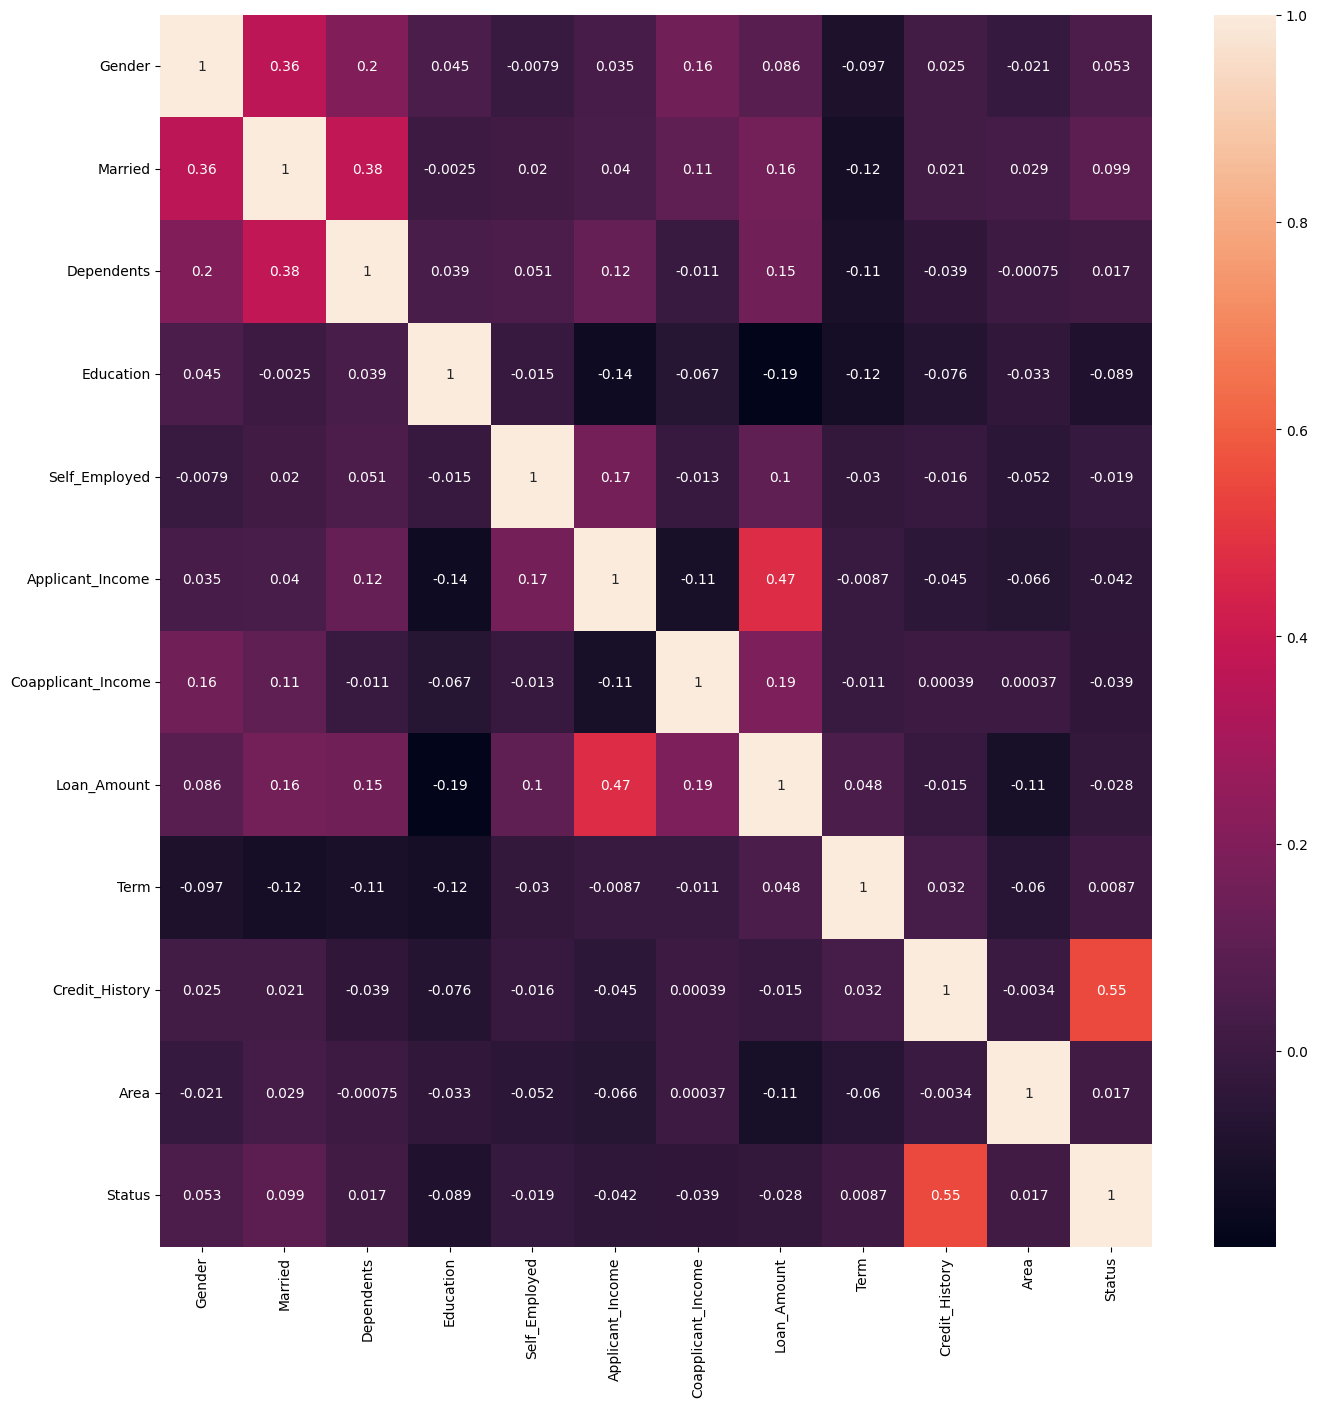

In [23]:
plt.figure(figsize = (16,16)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성
sns.heatmap(df.corr(),annot=True)
############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state = 10) #90% for train,validate / 10% for test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9,random_state = 10) # 8/9 for train 1/9 for validate

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (408, 11)
y_train's shape :  (408,)

X_val's shape :  (51, 11)
y_val's shape :  (51,)

X_test's shape :  (52, 11)
y_test's shape :  (52,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

test accuracy : 0.7307692307692307


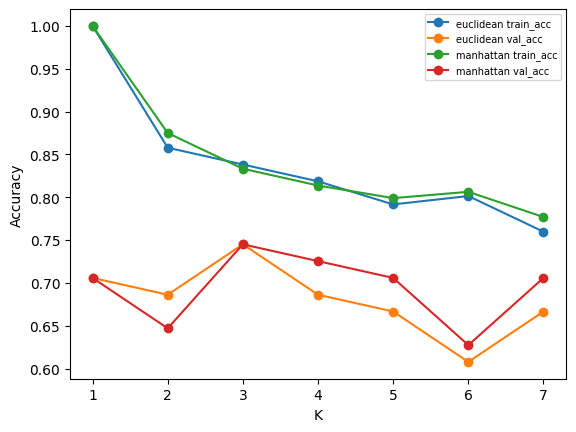

In [26]:
### 문제 1 ###
### 코드 작성 ###

#train_accuracy와 val_accuracy를 저장할 리스트
t_acc = []
v_acc = []

#사용할 거리의 척도 K 
distance_criterion = {'euclidean','manhattan'}
k_list = {1,2,3,4,5,6,7}

# 거리 척도, k값에 따라 train, validation 정확도를 구한다
for k in k_list:
  for criterion in distance_criterion: 
    knn = KNeighborsClassifier(n_neighbors = k, metric = criterion )
    knn.fit(X_train,y_train)
    yt_pred = knn.predict(X_train) # get train_accuracy
    train_accuracy = metrics.accuracy_score(y_train,yt_pred) 
    yv_pred = knn.predict(X_val) # get val_accurarcy
    val_accuracy = metrics.accuracy_score(y_val,yv_pred)
    t_acc.append((criterion,k,train_accuracy))
    v_acc.append((criterion,k,val_accuracy))

# 구한 train_accuracy와 val_accuracy을 나타내는 그래프를 그림
fig = plt.figure()
graph = fig.add_subplot()
graph.set_xlabel('K')
graph.set_ylabel('Accuracy')

for i,crit in enumerate(distance_criterion):
  #train accuracy graph
  CT = [data for data in t_acc if data[0] == crit]
  K = [data[1] for data in CT]
  acc = [data[2] for data in CT]
  graph.plot(K,acc,marker = 'o', label = crit+' train_acc')
  #validate accuracy graph
  CV = [data for data in v_acc if data[0] == crit]
  K = [data[1] for data in CV]
  acc = [data[2] for data in CV]
  graph.plot(K,acc,marker = 'o',label = crit+' val_acc')
graph.legend(loc = 'upper right',fontsize=7)

# 그래프를 통해 찾은 최적의 파라미터와 test set을 이용해 accuracy 계산
knn_t = KNeighborsClassifier(n_neighbors =3, metric = 'euclidean')
knn_t.fit(X_train,y_train)
yt_pred = knn_t.predict(X_test)
accuracy = metrics.accuracy_score(y_test,yt_pred)
print('test accuracy :', accuracy)
################

**설명 작성**  
- 최적의 파라미터: 최적의 파라미터는 두 criterion에 대해서 K = 3 일때이다.
- 설명: 먼저 train set에 대해서 정확도가 가장 높을 때는 K=1 이고 criterion은 두 개 다 같다. validation set에 대해서는 두 criterion에 대해서 K = 3 일때가 accuracy가 최대값을 가진다. 그렇기 때문에 validate_accuracy에서 모두 가장 정확도가 높은 경우인 두 criterion에 대해서 K = 3 일때가 가장 최적의 파라미터라고 판단할 수 있다. 왜냐하면 validate set이 모델이 새로운 데이터에 대해 얼마나 잘 작동할지 예측하는 데 더 유용하기 때문이다.

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [27]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [28]:
#이전에 8/9 : 1/9 로 나눈 validate set과 trainset을 다시합쳐 90%로 만듦. 한번만 실행해야함
X_train = np.concatenate((X_train,X_val),axis = 0)
y_train = np.concatenate((y_train,y_val),axis = 0)
#####################################################

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

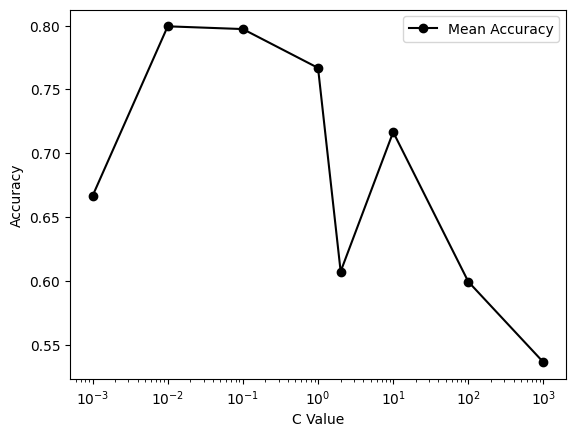

최적의 파라미터: C = 0.01
테스트 정확도: 0.8653846153846154


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


In [29]:
## 문제 6-1 ##
# 코드 작성
C_values = [0.001,0.01, 0.1, 1,2, 10, 100, 1000]
cv_results = []

kf = KFold(n_splits=5, shuffle=True, random_state = 42)

# 각 파라미터에 대한 교차 검증 수행
for C in C_values:
    svm = LinearSVC(C = C,max_iter = 10000)  
    # K-fold CV 결과
    cv_scores = cross_val_score(svm, X_train, y_train, cv=kf, scoring='accuracy')
    cv_results.append(cv_scores)

# 결과 시각화
cv_results_mean = [np.mean(cv_result) for cv_result in cv_results]
plt.semilogx(C_values, cv_results_mean, marker='o', color='black', label="Mean Accuracy")

plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 최적의 파라미터 찾기
best_idx = np.argmax(cv_results_mean)
best_C = C_values[best_idx]

# 테스트 정확도 계산
svm = LinearSVC(C=best_C, random_state=42,max_iter = 10000)
svm.fit(X_train, y_train)
test_pred = svm.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print(f"최적의 파라미터: C = {best_C}")
print(f"테스트 정확도: {test_accuracy}")
############

**설명 작성**  
- 최적의 파라미터: C = 0.01
- 설명: 0.001부터 1000까지의 10의 제곱으로 잘라서 C value의 값에 대한 5-fold를 진행하였다. mean accuracy를 그래프로 표현해 보았을 때 그중에  값이 높은 C= 0.01 일때의 5-fold한 값이 최적의 하이퍼 파라미터 값이라고 판단했다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

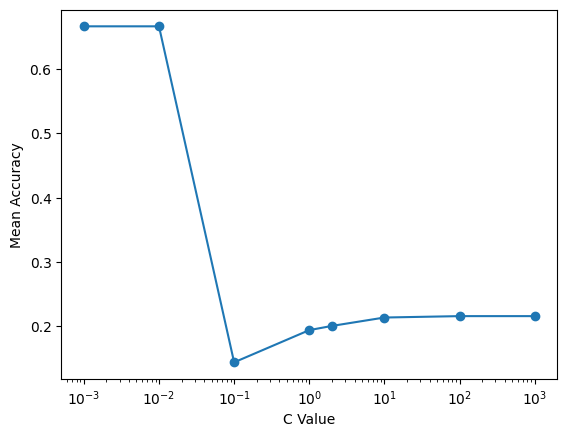

최적의 파라미터: C = 0.001
테스트 정확도: 0.7692307692307693


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


In [31]:
## 문제 6-2 ##
# 코드 작성
Cloo_values = [0.001,0.01, 0.1, 1,2, 10, 100, 1000]
loo_results = []

loo = LeaveOneOut()

# 각 파라미터에 대한 교차 검증 수행
for C in Cloo_values:
    svm = LinearSVC(C=C, random_state=42,max_iter = 1000)
    
    # Leave-One-Out CV 결과
    cv_scores = cross_val_score(svm, X_train, y_train, cv=loo,scoring = 'accuracy')
    loo_results.append(np.mean(cv_scores))

# 결과 시각화
plt.semilogx(Cloo_values, loo_results, marker='o')
plt.xlabel("C Value")
plt.ylabel("Mean Accuracy")
plt.show()

# 최적의 파라미터 찾기
best_idx = np.argmax(loo_results)
best_C = Cloo_values[best_idx]

# 테스트 정확도 계산
svm = LinearSVC(C=best_C, random_state=42,max_iter = 10000)
svm.fit(X_train, y_train)
test_pred = svm.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print(f"최적의 파라미터: C = {best_C}")
print(f"테스트 정확도: {test_accuracy}")
############

**설명 작성**  
- 최적의 파라미터:C = 0.001
- 설명: 테스트 정확도의 mean이 가장 높은 경우를 최적의 파라미터로 설정하였다. LOO를 이용하였더니 수렴하지 않아서 굉장히 많은 계산량이 소모되었고 max_iter = 10000을 설정하니 계산량이 너무 많아서 max_iter = 1000 을 이용해 계산을 진행하였을때의 가장 높은 점수는 C = 0.001과 0.01일 때이다.

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


poly = 0.6687768752986144
rbf = 0.6687768752986144
sigmoid = 0.6687768752986144


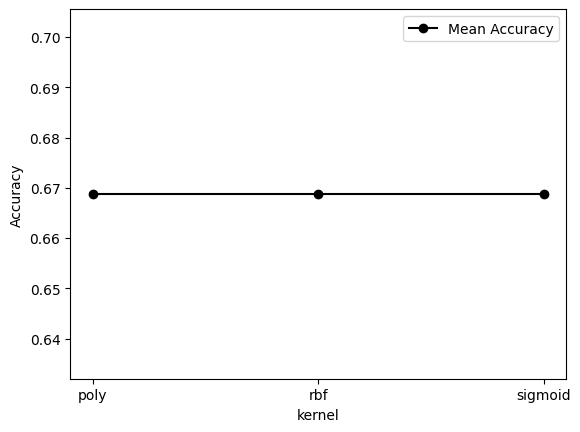

테스트 정확도: 0.7692307692307693


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [32]:
## 문제 7-1 ##
# 코드 작성
#####C.K,kernel
C = 2
k = 5
kernel_list = ['poly','rbf','sigmoid']
cv_results = []
############
kf = KFold(n_splits=k, shuffle=True, random_state = 42)
for kernel in kernel_list:
  svm = SVC(C = C,kernel = kernel,random_state = 42, max_iter = 10000)  

  cv_scores = cross_val_score(svm, X_train, y_train, cv=kf, scoring='accuracy')
  cv_results.append(cv_scores)
  print(kernel,'=',cv_scores.mean())

# 결과 시각화
cv_results_mean = [np.mean(cv_result) for cv_result in cv_results]
plt.plot(kernel_list, cv_results_mean, marker='o', color='black', label="Mean Accuracy")

plt.xlabel("kernel")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 최적의 파라미터 찾기
best_idx = np.argmax(cv_results_mean)
best_k = kernel_list[best_idx]

# 테스트 정확도 계산
svm = SVC(C=C,kernel = best_k, random_state=42,max_iter = 10000)
svm.fit(X_train, y_train)
test_pred = svm.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print(f"테스트 정확도: {test_accuracy}")

poly = 0.6688453159041394
rbf = 0.6623093681917211
sigmoid = 0.6688453159041394


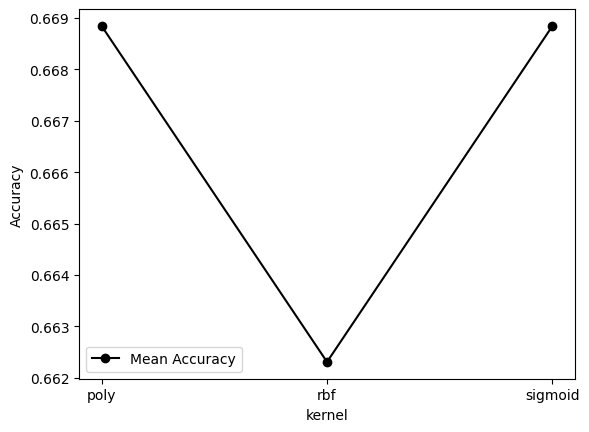

최적의 파라미터: C = 0.001
테스트 정확도: 0.7692307692307693


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [33]:
## 문제 7-2 ##
# 코드 작성
cv_result=[]
for kernel in kernel_list:
  svm = SVC(C = C,kernel = kernel,random_state = 42, max_iter = 10000)  

  cv_scores = cross_val_score(svm, X_train, y_train, cv=loo, scoring='accuracy')
  cv_result.append(cv_scores)
  print(kernel,'=',cv_scores.mean())

# 결과 시각화
cv_results_mean = [np.mean(cv_result) for cv_result in cv_result]

plt.plot(kernel_list, cv_results_mean, marker='o', color='black', label="Mean Accuracy")

plt.xlabel("kernel")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# 최적의 파라미터 찾기
best_idx = np.argmax(loo_results)
best_k = kernel_list[best_idx]

# 테스트 정확도 계산
svm = SVC(C=C, kernel = best_k, random_state=42,max_iter = 10000)
svm.fit(X_train, y_train)
test_pred = svm.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print(f"최적의 파라미터: C = {best_C}")
print(f"테스트 정확도: {test_accuracy}")
############

**7-3 설명 작성**  
- 설명: 주어진 조건에서 kernel list를 이용해 kernel이 polynomial, rbf, sigmoid일때의 정확도를 구한 뒤 최적의 파라미터를 이용해 테스트 데이터에 대해 테스트 정확도가 얼마나 나오는지 비교한후, 그 값을 6번의 것과 비교해서 이 정확도의 크기에 따라 이 데이터가 선형인지 비선형인지 알아보고자 하였다. 먼저 7-1에서는 kernel에 관계없이 평균 정확도가 0.6687768752986144임을 확인할 수 있었고, 7-2에스는 kernel마다 다른 성능을 보이며 그중에서도 rbf kernel을 제외한 kernel들의 평균 정확도가 가장 높았다. 
이를 통해 train과정에서는 데이터를 linear하게 학습하였을때가 정확도의 평균은 더 높다는 것을 알 수 있었다.
다음으로 test를 했을때를 살펴보면 linear일 때의 평균 정확도는 0.7692307692307693이었고 nonlinear일 때의 평균 정확도는 0.7692307692307693로 같았다. 이는 해당 데이터셋에서 선형과 비선형 모델이 동일한 성능을 냈다고 할 수 있다.
즉 해당 데이터는 test에서 선형, 비선형에서 거의 동일한 성능을 지닌다고 생각하고 train data의 결과에 따르면 linear할때가 훨씬  높으므로 linear한 데이터라고 생각한다.

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [35]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [36]:
## 문제 8-1 ##
## 코드 작성 ##
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc, param_grid=param_grid,cv = 5)
grid_search.fit(X,y)
print("best param : ",grid_search.best_params_)
############

best param :  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 200}


### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [37]:
from sklearn.metrics import accuracy_score

In [40]:
## 문제 8-2 ##
## 코드 작성 ##
rfc_optimal = RandomForestClassifier(criterion = 'entropy',max_depth = 7,max_features = 'log2',n_estimators = 200)
rfc.fit(X_train,y_train)#학습
y_pred = rfc.predict(X_test)#예측
accuracy = accuracy_score(y_test,y_pred)#정확도 측정
print("Test accuracy : ",accuracy)
############

Test accuracy :  0.7884615384615384


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
